In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv("../data/train_titanic_indo_200.csv")

In [78]:
df.head()

,ID_Penumpang,Selamat,Kelas_Tiket,Nama,Jenis_Kelamin,Usia,Saudara_Spouse,Orangtua_Anak,Tiket,Harga_Tiket,Kabin,Pelabuhan_Naik
0,1,0,1,Vina Pratama,pria,46.0,2,0,TKT-98777,57.67,B,Queenstown
1,2,1,3,Adi Nugroho,wanita,30.0,2,1,TKT-32810,83.35,E,Southampton
2,3,0,2,Hendra Kusuma,wanita,38.0,1,1,TKT-90676,54.83,E,Queenstown
3,4,0,3,Erik Pratama,wanita,26.0,1,1,TKT-84593,16.05,F,Southampton
4,5,0,3,Wawan Salim,pria,34.0,0,2,TKT-49446,46.47,F,Cherbourg


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Penumpang    100 non-null    int64  
 1   Selamat         100 non-null    int64  
 2   Kelas_Tiket     100 non-null    int64  
 3   Nama            100 non-null    object 
 4   Jenis_Kelamin   100 non-null    object 
 5   Usia            100 non-null    float64
 6   Saudara_Spouse  100 non-null    int64  
 7   Orangtua_Anak   100 non-null    int64  
 8   Tiket           100 non-null    object 
 9   Harga_Tiket     100 non-null    float64
 10  Kabin           87 non-null     object 
 11  Pelabuhan_Naik  100 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.5+ KB


In [64]:
df.describe()

,ID_Penumpang,Selamat,Kelas_Tiket,Usia,Saudara_Spouse,Orangtua_Anak,Harga_Tiket
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.560000,2.260000,31.310000,0.860000,0.960000,52.831500
std,29.011492,0.498888,0.799242,12.083627,0.804281,0.863631,26.497028
min,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,11.230000
25%,25.750000,0.000000,2.000000,21.000000,0.000000,0.000000,31.620000
50%,50.500000,1.000000,2.000000,32.000000,1.000000,1.000000,48.385000
75%,75.250000,1.000000,3.000000,38.000000,2.000000,2.000000,77.100000
max,100.000000,1.000000,3.000000,76.000000,2.000000,2.000000,99.620000


In [65]:
df.describe(include=['O'])

,Nama,Jenis_Kelamin,Tiket,Kabin,Pelabuhan_Naik
count,100,100,100,87,100
unique,100,2,100,6,3
top,Penumpang 1,wanita,TKT-93810,E,Southampton
freq,1,52,1,18,64


In [16]:
df.isnull().sum()

ID_Penumpang       0
Selamat            0
Kelas_Tiket        0
Nama               0
Jenis_Kelamin      0
Usia               0
Saudara_Spouse     0
Orangtua_Anak      0
Tiket              0
Harga_Tiket        0
Kabin             27
Pelabuhan_Naik     0
dtype: int64

In [18]:
(df.isnull().mean()* 100).round(2)

ID_Penumpang       0.0
Selamat            0.0
Kelas_Tiket        0.0
Nama               0.0
Jenis_Kelamin      0.0
Usia               0.0
Saudara_Spouse     0.0
Orangtua_Anak      0.0
Tiket              0.0
Harga_Tiket        0.0
Kabin             13.5
Pelabuhan_Naik     0.0
dtype: float64

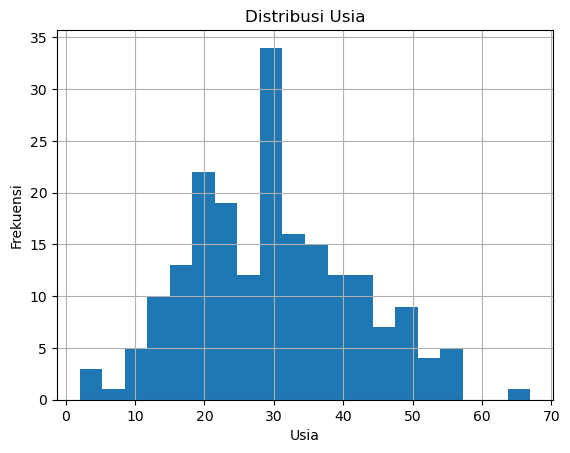

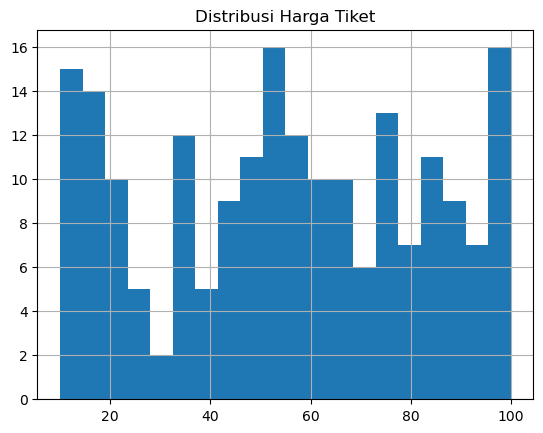

In [55]:
df['Usia'].hist(bins=20)
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

df['Harga_Tiket'].hist(bins=20)
plt.title("Distribusi Harga Tiket")
plt.show()

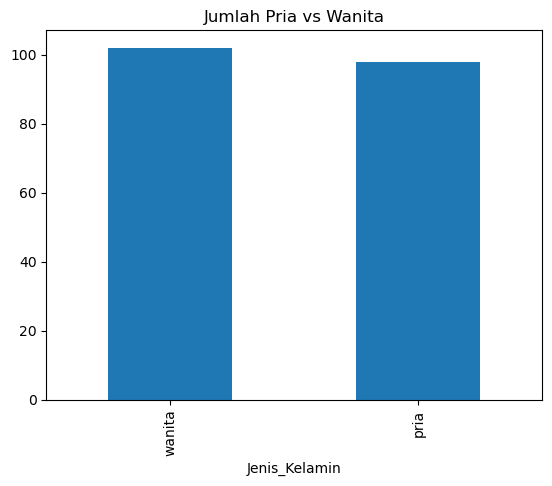

In [22]:
df['Jenis_Kelamin'].value_counts().plot.bar()
plt.title("Jumlah Pria vs Wanita")
plt.show()

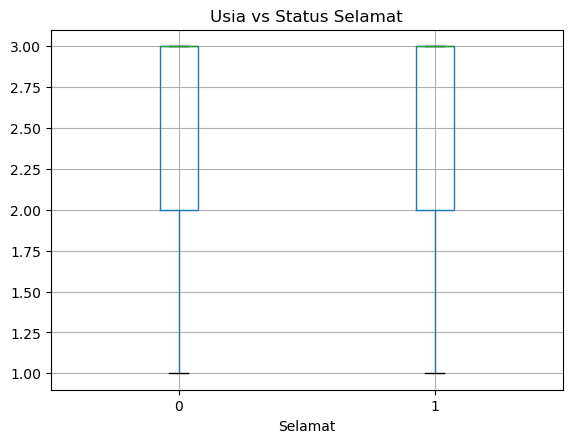

In [82]:
df.boxplot(column='Kelas_Tiket', by='Selamat')
plt.title("Usia vs Status Selamat")
plt.suptitle("")
plt.show()

Kabin
A    24
B    25
C    35
D    27
E    29
F    33
Name: Selamat, dtype: int64


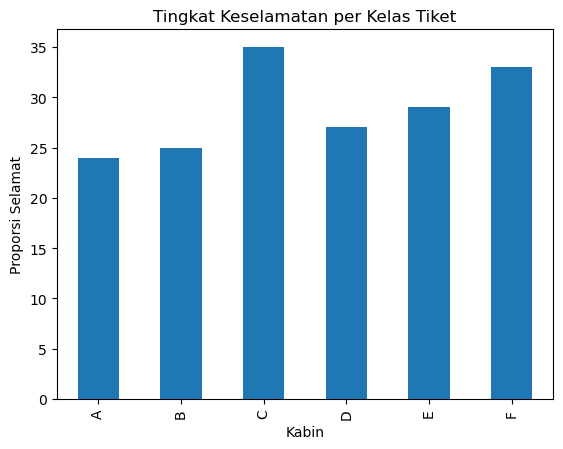

In [104]:
rate_by_class = df.groupby('Kabin')['Selamat'].count()
print(rate_by_class)
rate_by_class.plot.bar()
plt.title("Tingkat Keselamatan per Kelas Tiket")
plt.ylabel("Proporsi Selamat")
plt.show()

             Selamat  Kelas_Tiket
Selamat      1.00000     -0.07048
Kelas_Tiket -0.07048      1.00000


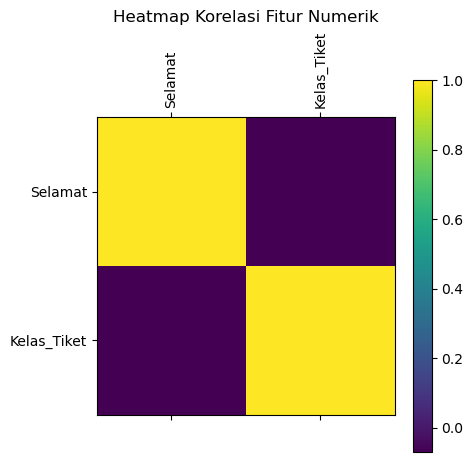

In [90]:
corr = df[['Selamat','Kelas_Tiket']].corr()
print(corr)

plt.matshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

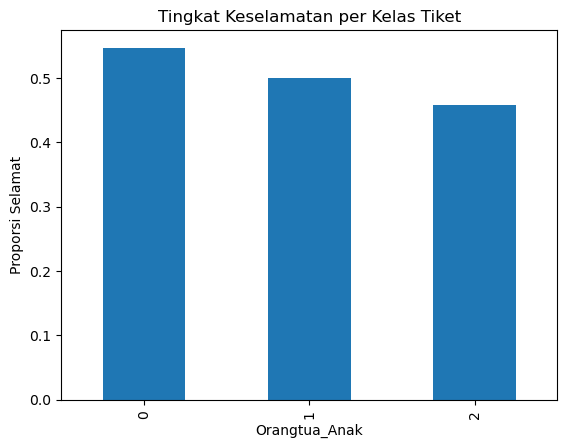

In [94]:
rate_by_class = df.groupby('Orangtua_Anak')['Selamat'].mean()

rate_by_class.plot.bar()
plt.title("Tingkat Keselamatan per Kelas Tiket")
plt.ylabel("Proporsi Selamat")
plt.show()